<a href="https://colab.research.google.com/github/jctovaru-isil-pe/curso-ciencia-datos-ml-202602/blob/main/ISIL_DataScience_ML_Sesion03_1_RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Cargar (importar) un dataset - Mercado Inmobiliario en California
california = fetch_california_housing(download_if_missing=True)

df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target

In [ ]:
# Analisis Descriptivo del dataset
print(df.info())
print(df.describe())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge  ...     Longitude         Price
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...   -119.569704      2.068558
std        1.899822     12.585558  ...      2.003532      1.153956
min        0.499900      1.000000  ...   -124.350000      0.149990
25%        2.563400     18.000000  ...   -121.800000      1.1

In [ ]:
# Definir las caracteristicas (X) y la prediccion (y)
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']]
y = df['Price']

# Preparar el entrenamiento de los datos (particionarlos) en datos de entrenamiento y datos de prueba
tam_datos_prueba = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tam_datos_prueba, random_state=42)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

       MedInc  HouseAge  AveRooms  AveOccup
14196  3.2596      33.0  5.017657  3.691814
8267   3.8125      49.0  4.473545  1.738095
17445  4.1563       4.0  5.645833  2.723214
14265  1.9425      36.0  4.002817  3.994366
2271   3.5542      43.0  6.268421  2.300000
...       ...       ...       ...       ...
11284  6.3700      35.0  6.129032  3.032258
11964  3.0500      33.0  6.868597  3.904232
5390   2.9344      36.0  3.986717  3.332068
860    5.7192      15.0  6.395349  3.178891
15795  2.5755      52.0  3.402576  2.108696

[16512 rows x 4 columns]
       MedInc  HouseAge  AveRooms  AveOccup
20046  1.6812      25.0  4.192201  3.877437
3024   2.5313      30.0  5.039384  2.679795
15663  3.4801      52.0  3.977155  1.360332
20484  5.7376      17.0  6.163636  3.444444
9814   3.7250      34.0  5.492991  2.483645
...       ...       ...       ...       ...
15362  4.6050      16.0  7.002212  2.988938
16623  2.7266      28.0  6.131915  2.340426
18086  9.2298      25.0  7.237676  2.790493
2144  

In [ ]:
# Creacion del modelo - Regresion Lineal
model = LinearRegression()

# Entrenamiento del modelo con los datos de entrenamiento: X_train, y_train
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Imprimir los coeficientes que han sido calculados en model.fit()
print("-- Imprimir los coeficientes beta (vector) calculados del modelo")

for feat, coef in zip(X.columns, model.coef_):
    print(f"{feat}: {coef:.4f}")

-- Imprimir los coeficientes beta (vector) calculados del modelo
MedInc: 0.4455
HouseAge: 0.0169
AveRooms: -0.0284
AveOccup: -0.0041


In [ ]:
df[['AveRooms', 'Price']].corr()

,AveRooms,Price
AveRooms,1.000000,0.151948
Price,0.151948,1.000000


In [ ]:
# Prepara los datos nuevos a predecir
datos_nuevos = pd.DataFrame([[5.0, 20, 5, 3]], columns=X.columns)

# Realizar la prediccion (y nuevo)
prediccion = model.predict(datos_nuevos)

print(f"La prediccion es: {prediccion[0]}")
print(f"La prediccion es (en USD): $ {prediccion[0]*10000: .2f}")

La prediccion es: 2.4377715440544114
La prediccion es (en USD): $  24377.72


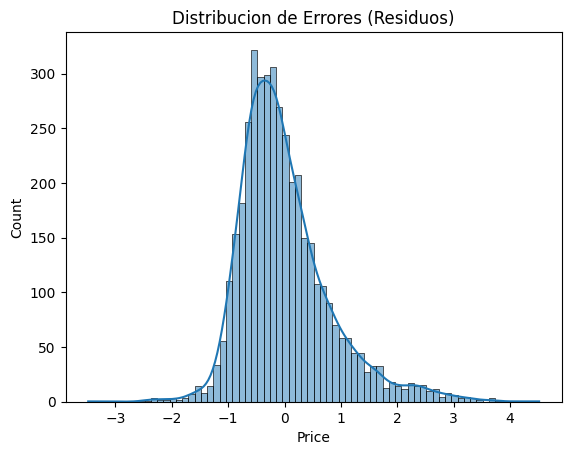

In [ ]:
# Prediccion de los datos de prueba (X_test)
y_pred = model.predict(X_test)

# Residuo
residual = y_test - y_pred

sns.histplot(residual, kde=True)
plt.title("Distribucion de Errores (Residuos)")
plt.show()

# En estadistica, se espera: e ~ N(Theta, o2)